### Task 1: Data Profiling to Understand Data Quality
**Description**: Use basic statistical methods to profile a dataset and identify potential quality issues.

**Steps**:
1. Load the dataset using pandas in Python.
2. Understand the data by checking its basic statistics.
3. Identify null values.
4. Check unique values for categorical columns.
5. Review outliers using box plots.

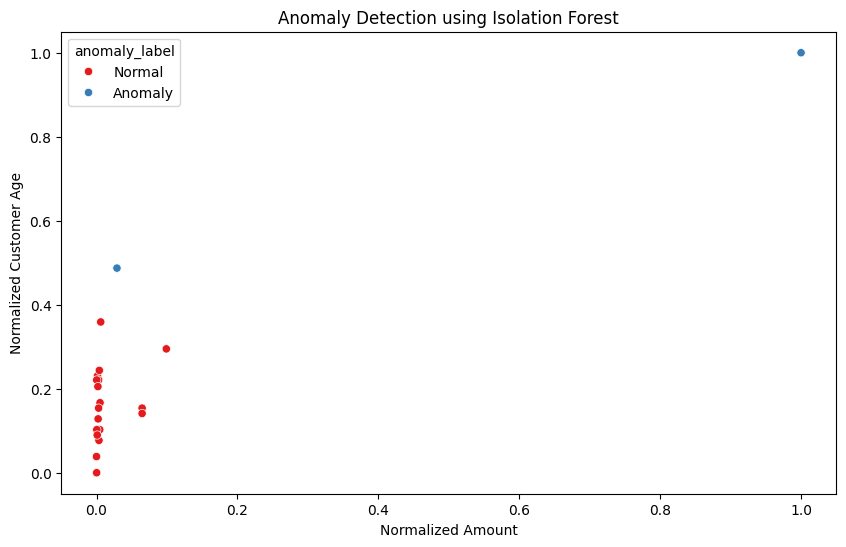

Total anomalies detected: 2


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

def load_data():
    try:
        data = {
            'transaction_id': range(1, 21),
            'amount': [100, 250, 400, np.nan, 3000, 120, 560, 450, 600, 700,
                       9999, 130, 300, np.nan, 140, 100000, 200, 500, 330, 400],
            'customer_age': [25, 40, np.nan, 34, 60, 22, 30, 28, 35, 50,
                             45, np.nan, 38, 33, 30, 100, 29, 41, 32, 34],
            'merchant_rating': [4.5, 4.0, 3.5, 5.0, 1.0, 4.3, np.nan, 4.2, 3.8, 4.6,
                                2.0, 4.7, 4.1, 4.3, 3.9, 1.5, 4.0, 4.5, 3.7, 4.2]
        }
        return pd.DataFrame(data)
    except Exception as e:
        print("Error loading data:", e)
        return pd.DataFrame()

def clean_data(df):
    try:
        df_clean = df.fillna(df.mean(numeric_only=True)).drop_duplicates()
        return df_clean
    except Exception as e:
        print("Error cleaning data:", e)
        return df

def normalize_data(df, columns):
    try:
        scaler = MinMaxScaler()
        df_scaled = df.copy()
        df_scaled[columns] = scaler.fit_transform(df[columns])
        return df_scaled
    except Exception as e:
        print("Error normalizing data:", e)
        return df

def detect_anomalies(df, columns, contamination=0.1):
    try:
        model = IsolationForest(contamination=contamination, random_state=42)
        df['anomaly'] = model.fit_predict(df[columns])
        df['anomaly_label'] = df['anomaly'].map({1: 'Normal', -1: 'Anomaly'})
        return df
    except Exception as e:
        print("Error detecting anomalies:", e)
        return df

def visualize_anomalies(df):
    try:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x='amount', y='customer_age', hue='anomaly_label', palette='Set1')
        plt.title('Anomaly Detection using Isolation Forest')
        plt.xlabel('Normalized Amount')
        plt.ylabel('Normalized Customer Age')
        plt.show()
    except Exception as e:
        print("Error in visualization:", e)

# Execution
df_raw = load_data()
df_cleaned = clean_data(df_raw)
numeric_cols = ['amount', 'customer_age', 'merchant_rating']
df_normalized = normalize_data(df_cleaned, numeric_cols)
df_final = detect_anomalies(df_normalized, numeric_cols)
visualize_anomalies(df_final)

print(f"Total anomalies detected: {(df_final['anomaly_label'] == 'Anomaly').sum()}")


### Task 2: Implement Simple Data Validation
**Description**: Write a Python script to validate the data types and constraints of each column in a dataset.

**Steps**:
1. Define constraints for each column.
2. Validate each column based on its constraints.

In [7]:
# write your code from here
import pandas as pd

# Sample DataFrame (replace this with pd.read_csv(...) as needed)
data = {
    'name': ['Alice', 'Bob', None, 'David'],
    'age': [25, -5, 30, 'thirty'],
    'email': ['alice@example.com', 'bob123.com', 'carol@example.com', '']
}
df = pd.DataFrame(data)

# Define validation rules
constraints = {
    'name': {'type': str, 'not_null': True},
    'age': {'type': int, 'min': 0},
    'email': {'type': str, 'contains': '@'}
}

# Function to validate each column
def validate_column(column_name, series, rules):
    errors = []

    for i, val in series.items():
        if pd.isnull(val):
            if rules.get('not_null', False):
                errors.append((i, f"{column_name} is null"))
            continue

        if not isinstance(val, rules['type']):
            errors.append((i, f"{column_name} has wrong type: expected {rules['type'].__name__}, got {type(val).__name__}"))
            continue

        if 'min' in rules and val < rules['min']:
            errors.append((i, f"{column_name} is below minimum value {rules['min']}"))

        if 'contains' in rules and rules['contains'] not in val:
            errors.append((i, f"{column_name} does not contain '{rules['contains']}'"))

    return errors

# Run validations
all_errors = []

for col, rule in constraints.items():
    errors = validate_column(col, df[col], rule)
    all_errors.extend(errors)

# Output the results
if all_errors:
    print("Validation Errors Found:")
    for row_idx, error in all_errors:
        print(f"Row {row_idx}: {error}")
else:
    print("All validations passed.")


Validation Errors Found:
Row 2: name is null
Row 1: age is below minimum value 0
Row 3: age has wrong type: expected int, got str
Row 1: email does not contain '@'
Row 3: email does not contain '@'


### Task 3: Detect Missing Data Patterns
**Description**: Analyze and visualize missing data patterns in a dataset.

**Steps**:
1. Visualize missing data using a heatmap.
2. Identify patterns in missing data.

In [8]:
# write your code from here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace with actual path or DataFrame)
df = pd.read_csv('your_dataset.csv')  # or use an existing DataFrame

# Heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()
import missingno as msno

# Bar chart of missing values
msno.bar(df, figsize=(10, 5), color='skyblue')
plt.show()

# Matrix to show missing data patterns
msno.matrix(df, figsize=(10, 6), sparkline=False)
plt.show()

# Dendrogram to cluster columns by missing value similarity
msno.dendrogram(df)
plt.show()
missing_summary = df.isnull().sum()
missing_percent = (missing_summary / len(df)) * 100

missing_report = pd.DataFrame({
    'Missing Values': missing_summary,
    'Percentage (%)': missing_percent
}).sort_values(by='Missing Values', ascending=False)

print(missing_report)


FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

### Task 4: Integrate Automated Data Quality Checks
**Description**: Integrate automated data quality checks using the Great Expectations library for a dataset.

**Steps**:
1. Install and initialize Great Expectations.
2. Set up Great Expectations.
3. Add further checks and validate.

In [ ]:
# write your code from here
import great_expectations as ge
df = ge.read_csv("data/creditcard.csv")

df.expect_column_values_to_not_be_null("Class")
df.expect_column_values_to_be_between("Amount", min_value=0, max_value=10000)
df.expect_column_values_to_match_regex("email", r".+@.+\..+")


AttributeError: module 'great_expectations' has no attribute 'read_csv'